# Sweep Examples

In [1]:
import alive_progress
import matplotlib.pyplot as plt
import numpy as np
import splib07

import rtm_wrapper.parameters as rtm_param
import rtm_wrapper.plot as rtm_plot
from rtm_wrapper.engines.sixs import PySixSEngine, pysixs_default_inputs
from rtm_wrapper.execution import ConcurrentExecutor
from rtm_wrapper.simulation import SweepSimulation

## Sweep a single input parameter

|████████████████████████████████████████| 460/460 [100%] in 9.1s (50.46/s)     


<xarray.DataArray 'apparent_radiance' (wavelength.value: 460)>
array([1.37000e-01, 4.80000e-02, 2.00000e-03, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.40000e-02,
       5.84000e-01, 3.79300e+00, 1.07400e+01, 2.09750e+01, 3.07190e+01,
       4.00210e+01, 4.92850e+01, 5.01000e+01, 5.42290e+01, 5.32630e+01,
       5.72790e+01, 6.17600e+01, 5.68860e+01, 6.99300e+01, 7.38890e+01,
       6.45100e+01, 7.27860e+01, 5.87170e+01, 7.39910e+01, 6.02880e+01,
       1.06277e+02, 1.09231e+02, 1.13830e+02, 1.19673e+02, 1.15817e+02,
       1.14845e+02, 1.02365e+02, 1.20560e+02, 1.23245e+02, 1.33405e+02,
       1.42776e+02, 1.40749e+02, 1.42479e+02, 1.41048e+02, 1.39744e+02,
       1.42331e+02, 1.45151e+02, 1.32850e+02, 1.37120e+02, 1.40220e+02,
       1.34632e+02, 1.37281e+02, 1.37690e+02, 1.29853e+02, 1.28269e+02,
       1.32263e+02, 1.35603e+02, 1.34674e+02, 1.31461e+02, 1.33275e+02,
       1.32691e+02, 1.32667e+02, 1.29116e+02, 1.30313e+02, 1.26856e+02,
       1.30149e+02, 1.29650e+02, 1.30320e+02, 1.12563e+02, 1.21000e+02,
       1.24528e+02, 1.25198e+02, 1.23302e+02, 1.20288e+02, 1.22705e+02,
       1.20088e+02, 1.17426e+02, 1.19116e+02, 1.18582e+02, 1.17139e+02,
       1.14522e+02, 1.07622e+02, 1.12756e+02, 1.14334e+02, 1.13049e+02,
       1.12095e+02, 1.10981e+02, 1.08948e+02, 9.94830e+01, 9.30710e+01,
...
       4.50400e+00, 1.64100e+00, 4.18800e+00, 2.40100e+00, 2.67300e+00,
       5.93600e+00, 6.55000e+00, 7.40400e+00, 7.10700e+00, 7.30600e+00,
       5.56400e+00, 4.81100e+00, 5.81000e+00, 5.07000e+00, 5.07800e+00,
       6.10000e+00, 6.98600e+00, 6.55200e+00, 6.85000e+00, 6.75900e+00,
       6.54500e+00, 6.70900e+00, 6.76000e+00, 6.62400e+00, 6.80200e+00,
       6.67800e+00, 6.60300e+00, 6.73400e+00, 6.78000e+00, 6.71100e+00,
       6.57200e+00, 5.85600e+00, 5.82700e+00, 6.06300e+00, 6.25600e+00,
       5.88400e+00, 5.65900e+00, 5.42500e+00, 5.85100e+00, 5.62800e+00,
       5.12500e+00, 5.47900e+00, 5.87800e+00, 5.59200e+00, 5.79400e+00,
       5.60700e+00, 5.70400e+00, 5.52400e+00, 5.54600e+00, 5.40000e+00,
       5.42300e+00, 5.20100e+00, 5.11100e+00, 5.23500e+00, 4.97700e+00,
       4.96400e+00, 4.95700e+00, 4.96100e+00, 4.79900e+00, 4.67900e+00,
       4.57300e+00, 4.67700e+00, 4.92500e+00, 3.95300e+00, 3.92300e+00,
       3.93000e+00, 4.53700e+00, 4.31600e+00, 3.78300e+00, 3.88100e+00,
       2.82500e+00, 3.91900e+00, 3.60600e+00, 3.68100e+00, 2.77500e+00,
       2.75200e+00, 2.80200e+00, 2.46500e+00, 2.88300e+00, 3.08100e+00,
       3.75900e+00, 2.35200e+00, 2.41900e+00, 2.40100e+00, 1.33700e+00,
       2.65500e+00, 3.94400e+00, 8.95000e-01, 3.45400e+00, 9.70000e-01,
       9.62000e-01, 1.34200e+00, 1.90900e+00, 2.39600e+00, 6.82000e-01,
       6.76000e-01, 1.40900e+00, 8.25000e-01, 3.61000e-01, 5.08000e-01])
Coordinates:
  * wavelength.value  (wavelength.value) float64 0.2 0.205 0.21 ... 2.49 2.495
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

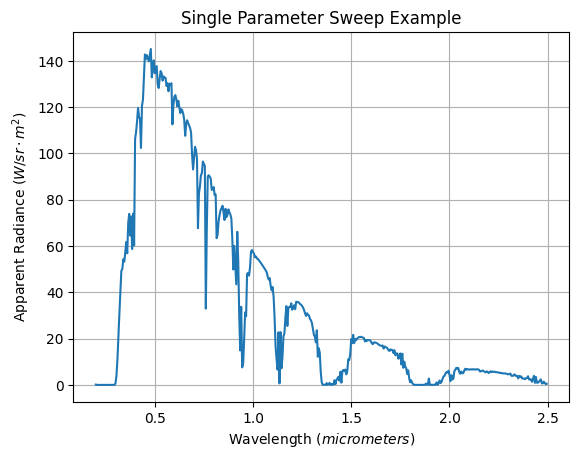

In [2]:
sweep = SweepSimulation(
    {
        "wavelength.value": np.arange(0.2, 2.5, 0.005),
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_single(plot_var)
ax.set_title("Single Parameter Sweep Example")
ax.grid(True);

## Sweep through the cartesian product of two input parameter ranges

|████████████████████████████████████████| 366/366 [100%] in 7.5s (48.78/s)     


<xarray.DataArray 'apparent_radiance' (wavelength.value: 61, atmosphere.ozone: 6)>
array([[134.043, 133.857, 133.672, 133.487, 133.302, 133.117],
       [135.269, 135.054, 134.839, 134.625, 134.41 , 134.197],
       [136.496, 136.251, 136.006, 135.762, 135.519, 135.275],
       [136.689, 136.442, 136.195, 135.949, 135.702, 135.457],
       [136.89 , 136.64 , 136.392, 136.143, 135.895, 135.648],
       [132.981, 132.733, 132.486, 132.24 , 131.993, 131.748],
       [129.063, 128.817, 128.572, 128.327, 128.083, 127.839],
       [128.229, 127.967, 127.706, 127.446, 127.186, 126.927],
       [127.367, 127.087, 126.808, 126.53 , 126.253, 125.976],
       [129.282, 128.977, 128.673, 128.37 , 128.067, 127.765],
       [131.188, 130.856, 130.525, 130.195, 129.866, 129.538],
       [132.775, 132.414, 132.054, 131.695, 131.337, 130.98 ],
       [134.323, 133.929, 133.536, 133.144, 132.754, 132.364],
       [133.735, 133.317, 132.902, 132.487, 132.074, 131.662],
       [133.276, 132.847, 132.419, 131.993, 131.568, 131.144],
       [131.644, 131.207, 130.771, 130.337, 129.904, 129.472],
       [130.01 , 129.565, 129.122, 128.68 , 128.24 , 127.801],
       [130.877, 130.416, 129.957, 129.499, 129.043, 128.588],
       [131.706, 131.225, 130.747, 130.27 , 129.795, 129.322],
       [131.362, 130.865, 130.369, 129.876, 129.384, 128.894],
...
       [122.252, 121.517, 120.787, 120.061, 119.34 , 118.622],
       [122.816, 122.094, 121.376, 120.662, 119.952, 119.247],
       [121.936, 121.235, 120.537, 119.844, 119.154, 118.469],
       [121.058, 120.377, 119.701, 119.028, 118.358, 117.693],
       [119.65 , 118.998, 118.349, 117.704, 117.063, 116.425],
       [118.232, 117.608, 116.987, 116.369, 115.755, 115.144],
       [119.497, 118.886, 118.279, 117.674, 117.073, 116.474],
       [120.728, 120.128, 119.531, 118.936, 118.345, 117.756],
       [119.497, 118.919, 118.344, 117.772, 117.202, 116.635],
       [118.259, 117.703, 117.15 , 116.599, 116.051, 115.505],
       [117.523, 116.985, 116.45 , 115.917, 115.387, 114.859],
       [115.989, 115.473, 114.959, 114.448, 113.939, 113.432],
       [117.055, 116.549, 116.045, 115.544, 115.044, 114.547],
       [117.683, 117.198, 116.716, 116.236, 115.757, 115.281],
       [117.44 , 116.983, 116.527, 116.074, 115.622, 115.171],
       [117.188, 116.758, 116.329, 115.901, 115.476, 115.051],
       [116.754, 116.346, 115.94 , 115.535, 115.131, 114.729],
       [116.152, 115.764, 115.377, 114.992, 114.608, 114.225],
       [112.849, 112.489, 112.13 , 111.773, 111.416, 111.061],
       [113.767, 113.421, 113.075, 112.731, 112.388, 112.045]])
Coordinates:
  * wavelength.value  (wavelength.value) float64 0.5 0.5025 ... 0.6475 0.65
  * atmosphere.ozone  (atmosphere.ozone) float64 0.45 0.49 0.53 0.57 0.61 0.65
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

[0.5    0.5025 0.505  0.5075 0.51   0.5125 0.515  0.5175 0.52   0.5225
 0.525  0.5275 0.53   0.5325 0.535  0.5375 0.54   0.5425 0.545  0.5475
 0.55   0.5525 0.555  0.5575 0.56   0.5625 0.565  0.5675 0.57   0.5725
 0.575  0.5775 0.58   0.5825 0.585  0.5875 0.59   0.5925 0.595  0.5975
 0.6    0.6025 0.605  0.6075 0.61   0.6125 0.615  0.6175 0.62   0.6225
 0.625  0.6275 0.63   0.6325 0.635  0.6375 0.64   0.6425 0.645  0.6475
 0.65  ] <xarray.DataArray 'apparent_radiance' (wavelength.value: 61)>
array([134.043, 135.269, 136.496, 136.689, 136.89 , 132.981, 129.063,
       128.229, 127.367, 129.282, 131.188, 132.775, 134.323, 133.735,
       133.276, 131.644, 130.01 , 130.877, 131.706, 131.362, 131.005,
       130.912, 130.822, 128.987, 127.154, 127.658, 128.174, 127.584,
       125.338, 127.7  , 128.142, 127.825, 127.393, 127.785, 128.115,
       124.507, 113.753, 117.996, 120.798, 122.112, 122.205, 122.252,
       122.816, 121.936, 121.058, 119.65 , 118.232, 119.497, 120.728,
       119.49

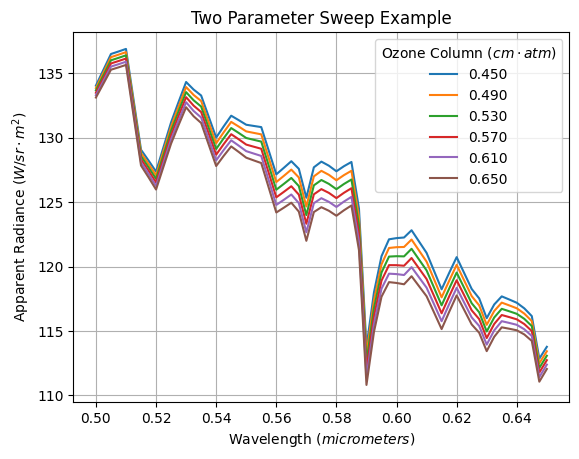

In [3]:
sweep = SweepSimulation(
    {
        "wavelength.value": np.arange(0.5, 0.65, 0.0025),
        "atmosphere.ozone": np.arange(0.45, 0.66, 0.04),
    },
    base=pysixs_default_inputs().replace(atmosphere=rtm_param.AtmosphereWaterOzone(water=2)),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_legend(plot_var, xaxis_dim="wavelength.value")
ax.set_title("Two Parameter Sweep Example")
ax.grid(True);

## Sweep through the cartesian product of three input parameter ranges

|████████████████████████████████████████| 4140/4140 [100%] in 1:26.6 (47.76/s) 


<xarray.DataArray 'apparent_radiance' (wavelength.value: 460,
                                       atmosphere.name: 3,
                                       aerosol_profile.name: 3)>
array([[[1.370e-01, 5.100e-02, 9.600e-02],
        [2.800e-02, 1.000e-02, 2.000e-02],
        [2.780e-01, 1.030e-01, 1.960e-01]],

       [[4.800e-02, 1.800e-02, 3.400e-02],
        [6.000e-03, 2.000e-03, 4.000e-03],
        [1.220e-01, 4.700e-02, 8.700e-02]],

       [[2.000e-03, 1.000e-03, 2.000e-03],
        [0.000e+00, 0.000e+00, 0.000e+00],
        [1.100e-02, 4.000e-03, 8.000e-03]],

       ...,

       [[8.250e-01, 8.210e-01, 8.360e-01],
        [2.294e+00, 2.281e+00, 2.323e+00],
        [6.070e-01, 6.030e-01, 6.150e-01]],

       [[3.610e-01, 3.590e-01, 3.660e-01],
        [1.828e+00, 1.817e+00, 1.851e+00],
        [2.180e-01, 2.170e-01, 2.210e-01]],

       [[5.080e-01, 5.050e-01, 5.150e-01],
        [2.019e+00, 2.008e+00, 2.045e+00],
        [3.330e-01, 3.310e-01, 3.370e-01]]])
Coordinates:
  * wavelength.value      (wavelength.value) float64 0.2 0.205 ... 2.49 2.495
  * atmosphere.name       (atmosphere.name) <U17 'MidlatitudeSummer' ... 'Tro...
  * aerosol_profile.name  (aerosol_profile.name) <U11 'Maritime' ... 'Contine...
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

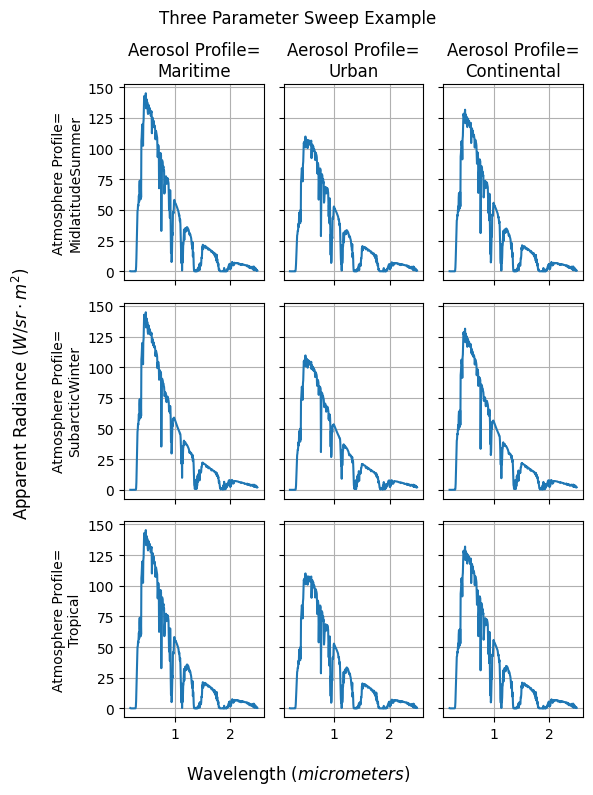

In [4]:
sweep = SweepSimulation(
    {
        "wavelength.value": np.arange(0.2, 2.5, 0.005),
        "atmosphere.name": ["MidlatitudeSummer", "SubarcticWinter", "Tropical"],
        "aerosol_profile.name": ["Maritime", "Urban", "Continental"],
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig = plt.figure(figsize=(6, 8))
_, axs = rtm_plot.plot_sweep_grid(
    plot_var, fig=fig, subplot_kwargs={"sharex": "all", "sharey": "all"}
)
fig.suptitle("Three Parameter Sweep Example")
for ax in axs.flat:
    ax.grid(True)
fig.tight_layout();

## Highly customized sweep.

|████████████████████████████████████████| 420/420 [100%] in 5.9s (71.15/s)     


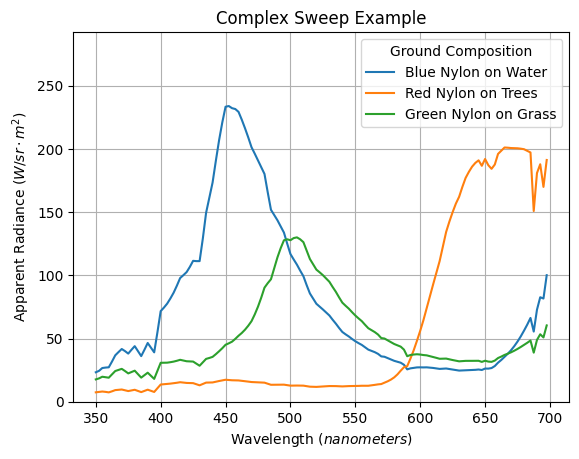

In [7]:
wavelengths = np.arange(0.35, 0.7, 0.0025)

usgs_lib = splib07.Splib07("./usgs_splib07")

targets = {
    "Blue Nylon": "Nylon_Fabric_GDS433_Blu_RpSt",
    "Red Nylon": "Nylon_Fabric_GDS431_Red_RpSt",
    "Green Nylon": "Nylon_Fabric_GDS432_Grn_RpSt",
}
backgrounds = {
    "Water": "MarshWater_CRMS121v69-NoGlnt",
    "Trees": "Oak_Oak-Leaf-1_fresh",
    "Grass": "Grass_Golden_Dry_GDS480",
}


target_lib = [usgs_lib.load(name, resample="oversampled") for name in targets.values()]

background_lib = [
    usgs_lib.load(name, resample="oversampled") for name in backgrounds.values()
]
labels = [f"{target} on {back}" for target, back in zip(targets, backgrounds)]


sweep = SweepSimulation(
    {
        "target": {
            # Sweep multiple parameters simultaneously
            "ground__target__wavelengths": [l.wavelengths for l in target_lib],
            "ground__target__spectrum": [l.spectrum for l in target_lib],
            "ground__background__wavelengths": [l.wavelengths for l in background_lib],
            "ground__background__spectrum": [l.spectrum for l in background_lib],
            # Use custom coordinates.
            "__coords__": labels,
            # Given the sweep coordinates a custom title.
            "__title__": "Ground Composition",
        },
        "wl": {
            "wavelength__value": wavelengths,
            # Represent wavelengths in nanometers installed of micrometers.
            "__coords__": wavelengths * 1e3,
            "__title__": "Wavelength",
            "__unit__": "nanometers",
        },
    },
    base=pysixs_default_inputs().replace(
        ground=rtm_param.GroundReflectanceHeterogeneousLambertian(
            target=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
            background=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
        )
    ),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, step_callback=lambda _: bar(), on_error="abort")

results = runner.collect_results()
plot_var = results.apparent_radiance

fig, ax = rtm_plot.plot_sweep_legend(plot_var, legend_kwargs={"loc": "upper right"})
ax.set_title("Complex Sweep Example")
ax.set_ylim(0, np.nanmax(plot_var.values) * 1.25)
ax.grid(True);

## Save results to file

In [8]:
results.to_netcdf("results.nc")
!ncdump results.nc | head -100

netcdf results {
dimensions:
	target = 3 ;
	wl = 140 ;
	string20 = 20 ;
	ground__target__wavelengths/0 = 2151 ;
	ground__target__spectrum/0 = 2151 ;
	ground__background__wavelengths/0 = 2151 ;
	ground__background__spectrum/0 = 2151 ;
variables:
	double wl(wl) ;
		wl:title = "Wavelength" ;
		wl:unit = "nanometers" ;
		wl:_FillValue = NaN ;
	double wavelength__value(wl) ;
		wavelength__value:title = "Wavelength" ;
		wavelength__value:unit = "micrometers" ;
		wavelength__value:_FillValue = NaN ;
	double ground__target__wavelengths(target, ground__target__wavelengths/0) ;
		ground__target__wavelengths:_FillValue = NaN ;
	double ground__target__spectrum(target, ground__target__spectrum/0) ;
		ground__target__spectrum:_FillValue = NaN ;
	double ground__background__wavelengths(target, ground__background__wavelengths/0) ;
		ground__background__wavelengths:_FillValue = NaN ;
	double ground__background__spectrum(target, ground__background__spectrum/0) ;
		ground__background__spectrum:_FillValue 